In [62]:
# importing stuff for drawing plots
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
# open the dataframes with the right separators
step_data = pd.read_csv("steps.csv", sep=";")
survey_data = pd.read_csv('survey.csv')

In [64]:
# merge the two dataframes, Cleaning the out of ranges and showing the head of the dataframe
df = survey_data.merge(step_data, on = "id")
df = df[df['height']< 200]
df = df[df['height']> 150]
df = df[df['weight']<110]
df = df[df['weight']>50]
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# The mean of each person steps from 20-06-2013 to 13-05-2014 (axis=1 for mean of each day of dataframe)
df['meansteps'] = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis=1)
# meansteps clean up
df = df[df['meansteps']<18000]
df = df[df['meansteps']> 100]
print(df)

      id         city  gender    age  hh_size  education          education_1  \
0      1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1      2        Lille    Male  35-44        1          3             Bachelor   
2      3  Montpellier    Male  25-34        2          2  Master or doctorate   
3      4         Lyon    Male    <25        1          1             Bachelor   
4      5  Montpellier  Female  25-34        3          4             Bachelor   
..   ...          ...     ...    ...      ...        ...                  ...   
924  925        Lille  Female  45-54        3          4  Master or doctorate   
925  926        Lille    Male    <25        3          5             Bachelor   
926  927  Montpellier    Male  35-44        2          2             Bachelor   
927  928        Lille  Female  55-64        1          1          High school   
928  929         Lyon    Male  25-34        2          2          High school   

     height  weight  20-6-2

In [66]:
# Checking about dataframes columns
df.info('columns')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 928
Data columns (total 338 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   city         object 
 2   gender       object 
 3   age          object 
 4   hh_size      int64  
 5   education    int64  
 6   education_1  object 
 7   height       float64
 8   weight       float64
 9   20-6-2013    float64
 10  21-6-2013    float64
 11  22-6-2013    float64
 12  23-6-2013    float64
 13  24-6-2013    float64
 14  25-6-2013    float64
 15  26-6-2013    float64
 16  27-6-2013    float64
 17  28-6-2013    float64
 18  29-6-2013    float64
 19  30-6-2013    float64
 20  1-7-2013     float64
 21  2-7-2013     float64
 22  3-7-2013     float64
 23  4-7-2013     float64
 24  5-7-2013     float64
 25  6-7-2013     float64
 26  7-7-2013     float64
 27  8-7-2013     float64
 28  9-7-2013     float64
 29  10-7-2013    float64
 30  11-7-2013    float64
 31  12-7-2013    float64
 32  13-7-

In [67]:
# Correlation matrix including all 3 variables
correlation = df[['height', 'weight', 'meansteps']].corr() 
correlation

,height,weight,meansteps
height,1.000000,0.563587,-0.044770
weight,0.563587,1.000000,-0.071124
meansteps,-0.044770,-0.071124,1.000000


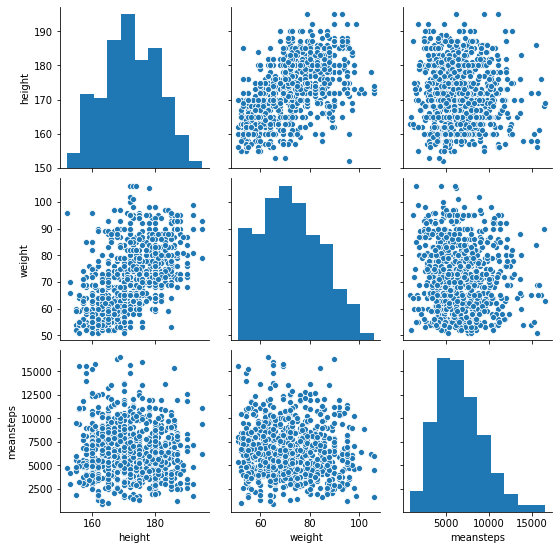

In [68]:
# Scatter plots of your variable with the 2 other variables 
df_sub = df[['height', 'weight', 'meansteps']]
df_sub = df_sub.dropna()
sns.pairplot(df_sub)
plt.show()

In [90]:
# Pearson’s correlation for the 2 relations
print(pearsonr(df_sub['meansteps'],df_sub['weight']))
print(pearsonr(df_sub['meansteps'],df_sub['height']))

(-0.07112358818155545, 0.037592345643817186)
(-0.04477002380354986, 0.19092986840105433)


## Verbal description of the relations, including strength of the association, linearity, etc.

The correlation between weight and mean steps is very low, there is a better correlation between weight and height. the value is not close to 0.

In [91]:
#The relation of mean steps per participant with a qualitative variable with two levels
df_sub3 = df[['gender', 'meansteps']]
df_sub3.head()

,gender,meansteps
0,Male,10205.521212
1,Male,5687.423313
2,Male,8301.729730
3,Male,3633.200000
4,Female,5312.129630


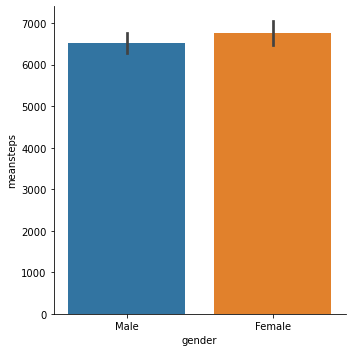

In [92]:
#Graphs of the relation (catplot of gender vs mean steps)
sns.catplot(x='gender', y='meansteps', kind = "bar", data= df_sub3)

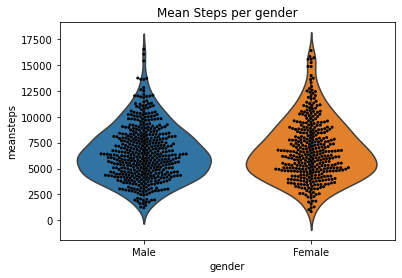

In [93]:
# Lineplot of the relation ( gender vs mean steps)
sns.violinplot(x= df_sub3.gender, y= df_sub3.meansteps)
plt.title('Mean Steps per gender')
sns.swarmplot(x= 'gender', y = 'meansteps', color = "k", size = 3, data = df_sub3)
plt.show()

In [94]:
meansteps_m = df.loc[df['gender'] == 'Male']
meansteps_f = df.loc[df['gender'] == 'Female']
median_meansteps_m = meansteps_m['meansteps'].median() 
median_meansteps_f = meansteps_f['meansteps'].median() 
print(f'The median of mean steps for males is: {median_meansteps_m}')  
print(f'The median of mean steps for females is: {median_meansteps_f}')

The median of mean steps for males is: 6240.073033707865
The median of mean steps for females is: 6283.759233035006


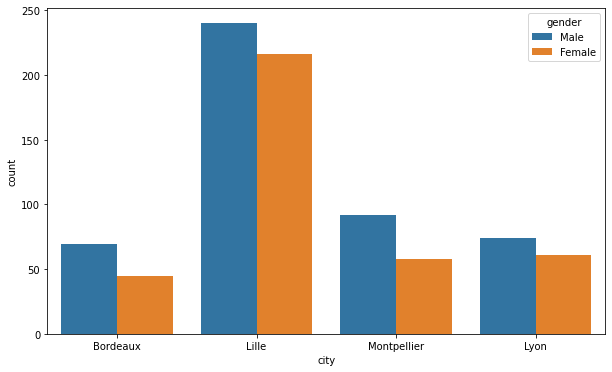

In [95]:
#The relation between two qualitative variables (barplot of gender vs city)

plt.figure(figsize=(10, 6))
sns.countplot(x="city", hue="gender", data=df)
plt.show()

In [96]:
# Cross table with relevant percentages

pd.crosstab(df['gender'],df['city'], normalize="columns")

city,Bordeaux,Lille,Lyon,Montpellier
gender,,,,
Female,0.394737,0.473684,0.451852,0.386667
Male,0.605263,0.526316,0.548148,0.613333


## Verbal description of the relation 
There are more participants from Lille. Males are more participate than females especially in Bordeaux and Montpellier.

In [97]:
# Cross table with relevant percentages
pd.crosstab(df['gender'],df['education_1'], normalize="columns")

education_1,Bachelor,High school,Master or doctorate,No degree,Primary,Vocational
gender,,,,,,
Female,0.492308,0.585106,0.363636,0.0,0.538462,0.486486
Male,0.507692,0.414894,0.636364,1.0,0.461538,0.513514


## Verbal description of the relation
Most participated females have a educational degree. male participants have a higher educational degree level.

## END OF Assignment

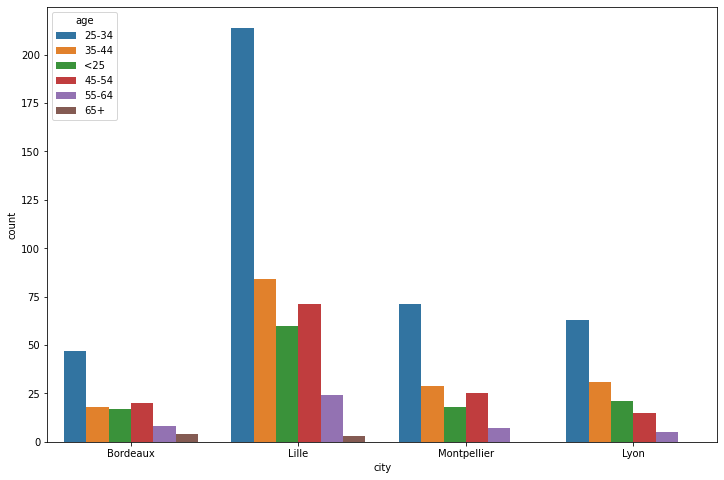

In [98]:
##The relation between two qualitative variables (barplot of age vs city)

plt.figure(figsize=(12, 8))  # adjust the fig size to avoid overlap of education details
sns.countplot(x='city', hue='age', data=df)
plt.show()

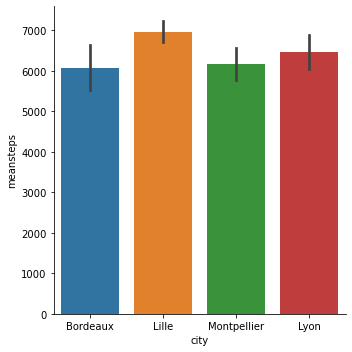

In [99]:
#Graphs of the relation (catplot of city vs mean steps)
sns.catplot(x='city', y='meansteps', kind = "bar", data= df_sub2)

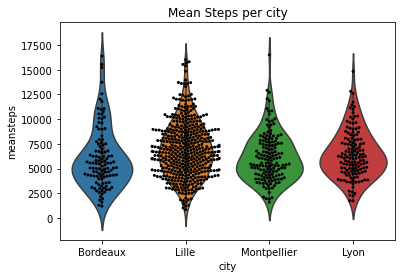

In [100]:
# Lineplot of the relation ( city vs mean steps)
sns.violinplot(x= df_sub2.city, y= df_sub2.meansteps)
plt.title('Mean Steps per city')
sns.swarmplot(x= "city", y = "meansteps", color = "k", size = 3, data = df_sub2)
plt.show()

In [101]:
# Cross table with relevant percentages
pd.crosstab(df['gender'],df['age'], normalize="columns")

age,25-34,35-44,45-54,55-64,65+,<25
gender,,,,,,
Female,0.405063,0.487654,0.519084,0.477273,0.142857,0.439655
Male,0.594937,0.512346,0.480916,0.522727,0.857143,0.560345


In [102]:
# The relation of mean steps per participant with a qualitative variable
df_sub3 = df[['city', 'meansteps']]
df_sub3.head()

,city,meansteps
0,Bordeaux,10205.521212
1,Lille,5687.423313
2,Montpellier,8301.729730
3,Lyon,3633.200000
4,Montpellier,5312.129630
